<a href="https://colab.research.google.com/github/therealericsun/deeparpes/blob/main/Deep_ARPES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installations

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/therealericsun/deeparpes

Cloning into 'deeparpes'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 80 (delta 26), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (80/80), done.


# Loading data

Add your own custom path to the data object below, `.h5` files supported.

In [6]:
from deeparpes.main.data_loader import load_data

data = load_data('/content/drive/MyDrive/h5_ARPES_Files/TaSe2_zap_0000.h5')

Beginning to load data...
Reshaping angle bounds...
Data from /content/drive/MyDrive/h5_ARPES_Files/TaSe2_zap_0000.h5 has been loaded, took 1.63 seconds.


# Non Clustering Visualization
Below are some basic usages of the package, without importing the deep learning modules.

Note: the K-means and iEDC/iADC integration algorithms are based on:

*Iwasawa, H., Ueno, T., Masui, T. et al. Unsupervised clustering for identifying spatial inhomogeneity on local electronic structures. npj Quantum Mater. 7, 24 (2022). https://doi.org/10.1038/s41535-021-00407-5*

Show shape of imported data

In [4]:
data.data.shape

(21, 21, 1064, 816)

Create an integrated intensity map in realspace

Formating data for graph...
Drawing graph...


<Figure size 432x432 with 0 Axes>

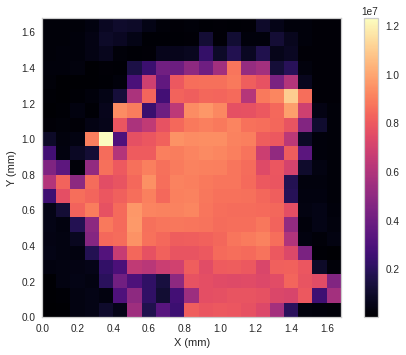

<Figure size 576x396 with 0 Axes>

In [5]:
data.show()

Show Angle-KE-Intensity distribution of a specified point

Formating data for point (13,5)...
Drawing graph...


<Figure size 432x432 with 0 Axes>

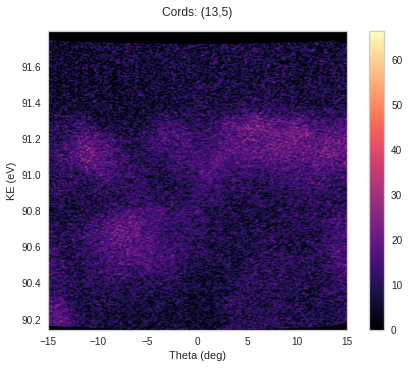

<Figure size 576x396 with 0 Axes>

In [6]:
data.show_point(13,5)

Integrate energy/angle densities

Formatting data for energy...
Integrating energy...
Drawing graph...


<Figure size 432x432 with 0 Axes>

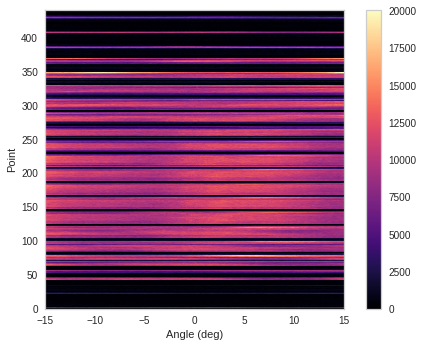

Formatting data for angle...
Integrating angle...
Drawing graph...


<Figure size 576x396 with 0 Axes>

<Figure size 432x432 with 0 Axes>

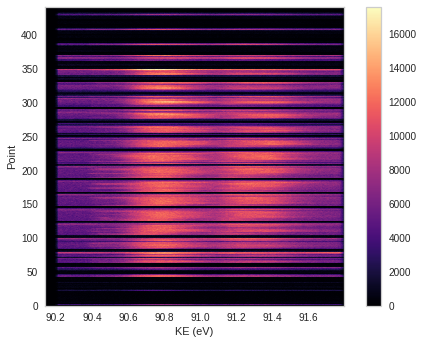

<Figure size 576x396 with 0 Axes>

In [7]:
data.show_energy()
data.show_angle()

# Elementery Clustering Methods (Non-Autoencoder)

Below are three methods, `angle`, `energy`, and `PCA`, which clusters based on iADC, iEDC, and Priciple Component Analysis respectively.

Use the `enhance` option to boost low-intensity data.

Use the `smooth` to extrapolate low-spacial resolition data using a KNN algorithm.

This creates a elbow diagram via `yellowbrick`, which could be used to estimate the number of good `n_clusters` later.

In [ ]:
data.elbow('PCA', range=(3,8), enhance = False)
data.elbow('angle', range=(3,8), enhance = False)
data.elbow('energy', range=(3,8), enhance = False)

This creates a silhouette diagram via `yellowbrick`.

In [ ]:
data.silhouette('angle')
data.silhouette('energy')
data.silhouette('PCA')

Apply k-means clustering.

Second input refers to the `n_clusters` hyperparameter, which dictates the number of desirable clusters.



Beginning PCA...
PCA reduction complete, took 18.81 seconds.
Beginning kmeans clustering, type is PCA...
Kmeans clustering complete, took 0.27 seconds.
Drawing graph...


<Figure size 432x432 with 0 Axes>

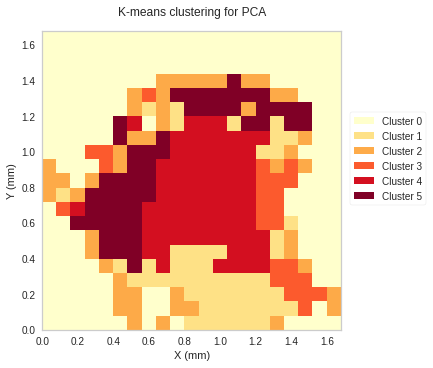

Integrating angle...
Beginning kmeans clustering, type is angle...
Kmeans clustering complete, took 0.67 seconds.
Drawing graph...


<Figure size 576x396 with 0 Axes>

<Figure size 432x432 with 0 Axes>

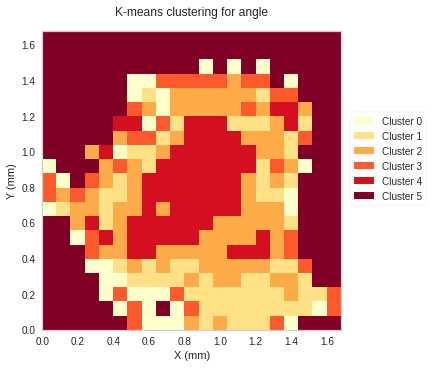

Integrating energy...
Beginning kmeans clustering, type is energy...
Kmeans clustering complete, took 0.27 seconds.
Drawing graph...


<Figure size 576x396 with 0 Axes>

<Figure size 432x432 with 0 Axes>

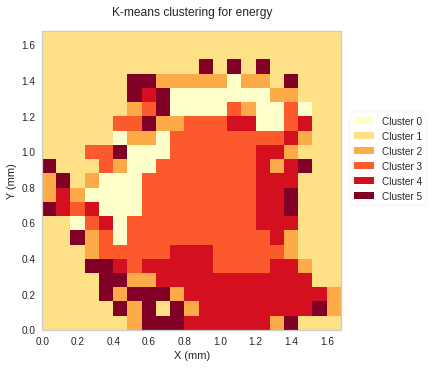

<Figure size 576x396 with 0 Axes>

In [10]:
data.show_kmeans('PCA', 6, smooth = False, enhance = False)
data.show_kmeans('angle', 6, smooth = False, enhance = False)
data.show_kmeans('energy', 6,smooth = False, enhance = False)

# Deep Clustering

This deep autoencoder algorihtm is based on:

*Demystifying Quantum Materials with Deep Learning and Angle-Resolved Photoemission Spectroscopy* by Eric Sun



To use deep learning, we must first import the autoencoder module

note: to use custom training datasets, set `x_train` and `x_test` to different datasets in `autoencoder.py`.

The default `gen` function in `autoencoder.py` has the following parameters:

1.   `n`: number of samples to generate
2.   y`l_range`: range of lengths for each cut
3.   `slope_range`: range of angles foe each cut, in momentum space kx and ky
4.   `c_range`: range of the center of each cut
5.   `w_range`: range of height of the cuts in angle space (height of the cuts)
6.   `w_c_range`: range of the center of the angle cuts
7.   `flip`: Wheter to randomly flip the training data
8.   `cutoff`: Whether to black of a certain section of the data, in oder to simulate the fermi energy level
9.   `cutoff_range`: The range of the cuttoff


Importing the autoencoder automatically configures it.

**REMEBER TO SWTICH TO A GPA-ACCELERATED RUNTIME**

In [9]:
from deeparpes.autoencoder import autoencoder

We can now observe the encoding of indivisual points:

Formating data for point (13,5)...
Drawing graph...


<Figure size 432x432 with 0 Axes>

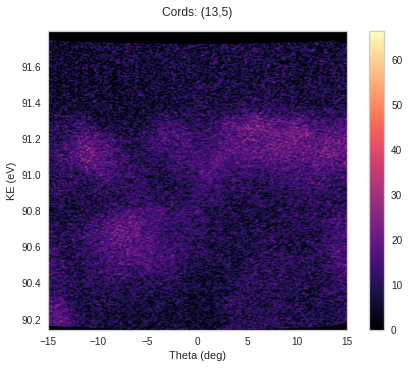

Formating decoding for point (13,5)...
Must fit autoencoder first.


error: ignored

<Figure size 576x396 with 0 Axes>

In [12]:
data.show_point(13,5)
data.show_decoding(13, 5, enhance = False)

# Indivisual Cluster Analysis

We can also create a `clustered` object directly, which allows for analysis of each indivisual cluster. 